Tipo de validación: cross-validation
Tamaño del conjunto de validación: 10%
Precisión promedio: 1.00
Precisión por clase promedio: 1.00
Exhaustividad/Recall por clase promedio: 1.00
Puntuación F1 por clase promedio: 1.00


Tipo de validación: cross-validation
Tamaño del conjunto de validación: 20%
Precisión promedio: 1.00
Precisión por clase promedio: 1.00
Exhaustividad/Recall por clase promedio: 1.00
Puntuación F1 por clase promedio: 1.00


Tipo de validación: cross-validation
Tamaño del conjunto de validación: 30%
Precisión promedio: 0.99
Precisión por clase promedio: 0.99
Exhaustividad/Recall por clase promedio: 1.00
Puntuación F1 por clase promedio: 1.00


Tipo de validación: leave-one-out
Tamaño del conjunto de validación: 10%
Precisión promedio: 0.99
Precisión por clase promedio: 0.84
Exhaustividad/Recall por clase promedio: 0.84
Puntuación F1 por clase promedio: 0.84


Tipo de validación: leave-one-out
Tamaño del conjunto de validación: 20%
Precisión promedio: 0.99
Precisión por

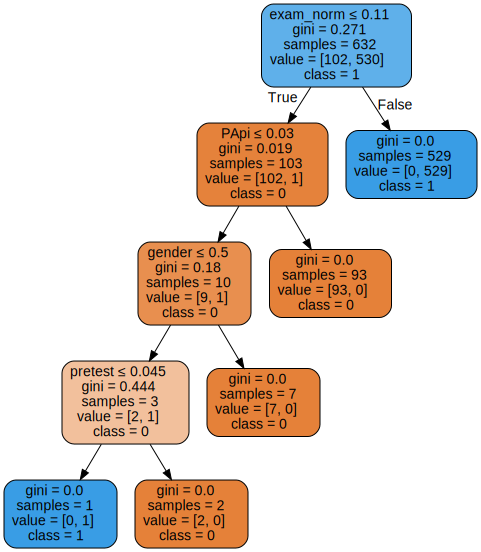

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
import graphviz

# Carga el conjunto de datos
df = pd.read_csv("data/data_prep.csv")
df.drop(columns=['student', 'lgain_pp', 'lgain_pe'], inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Elimina filas con valores NaN
df = df.dropna()

# Divide el conjunto de datos en características y etiquetas
X = df.drop(columns=['take_exam'])
y = df.take_exam

# Definir combinaciones de tipo de validación y tamaño de conjunto de validación
validation_types = ['cross-validation', 'leave-one-out']
validation_sizes = [0.1, 0.2, 0.3]

for validation_type in validation_types:
    if validation_type == 'cross-validation':
        for validation_size in validation_sizes:
            # Aplica validación cruzada
            kf = KFold(n_splits=int(1 / validation_size))
            accuracy_list = []
            precision_list = []
            recall_list = []
            f1_list = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                # Crea un clasificador de árbol de decisión con Gini como criterio
                clf = DecisionTreeClassifier(criterion='gini')

                # Entrena el árbol de decisión
                clf.fit(X_train, y_train)

                # Realiza predicciones en el conjunto de prueba
                y_pred = clf.predict(X_test)

                # Métricas de evaluación
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)

                accuracy_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                f1_list.append(f1)

            # Imprimir métricas promedio
            print("Tipo de validación: cross-validation")
            print("Tamaño del conjunto de validación: {:.0%}".format(validation_size))
            print("Precisión promedio: {:.2f}".format(np.mean(accuracy_list)))
            print("Precisión por clase promedio: {:.2f}".format(np.mean(precision_list)))
            print("Exhaustividad/Recall por clase promedio: {:.2f}".format(np.mean(recall_list)))
            print("Puntuación F1 por clase promedio: {:.2f}".format(np.mean(f1_list)))
            print("\n")

    elif validation_type == 'leave-one-out':
        for validation_size in validation_sizes:
            # Aplica leave-one-out
            loo = LeaveOneOut()
            accuracy_list = []
            precision_list = []
            recall_list = []
            f1_list = []

            for train_index, test_index in loo.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                # Crea un clasificador de árbol de decisión con Gini como criterio
                clf = DecisionTreeClassifier(criterion='gini')

                # Entrena el árbol de decisión
                clf.fit(X_train, y_train)

                # Realiza predicciones en el conjunto de prueba
                y_pred = clf.predict(X_test)

                # Métricas de evaluación
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)

                accuracy_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                f1_list.append(f1)

            # Imprimir métricas promedio
            print("Tipo de validación: leave-one-out")
            print("Tamaño del conjunto de validación: {:.0%}".format(validation_size))
            print("Precisión promedio: {:.2f}".format(np.mean(accuracy_list)))
            print("Precisión por clase promedio: {:.2f}".format(np.mean(precision_list)))
            print("Exhaustividad/Recall por clase promedio: {:.2f}".format(np.mean(recall_list)))
            print("Puntuación F1 por clase promedio: {:.2f}".format(np.mean(f1_list)))
            print("\n")


# Generar el gráfico del árbol de decisión
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=df.drop(columns=['take_exam']).columns,
                           class_names=["0", "1"],
                           filled=True, rounded=True,
                           special_characters=True)

# Crear un objeto graphviz a partir del gráfico generado
graph = graphviz.Source(dot_data)

# Mostrar el gráfico del árbol de decisión
graph